4.Take any image and apply the Fourier Transform to this image and the following
filters:

( Python or MATLAB)
(b) Butterworth filters
(c) Gaussian filters

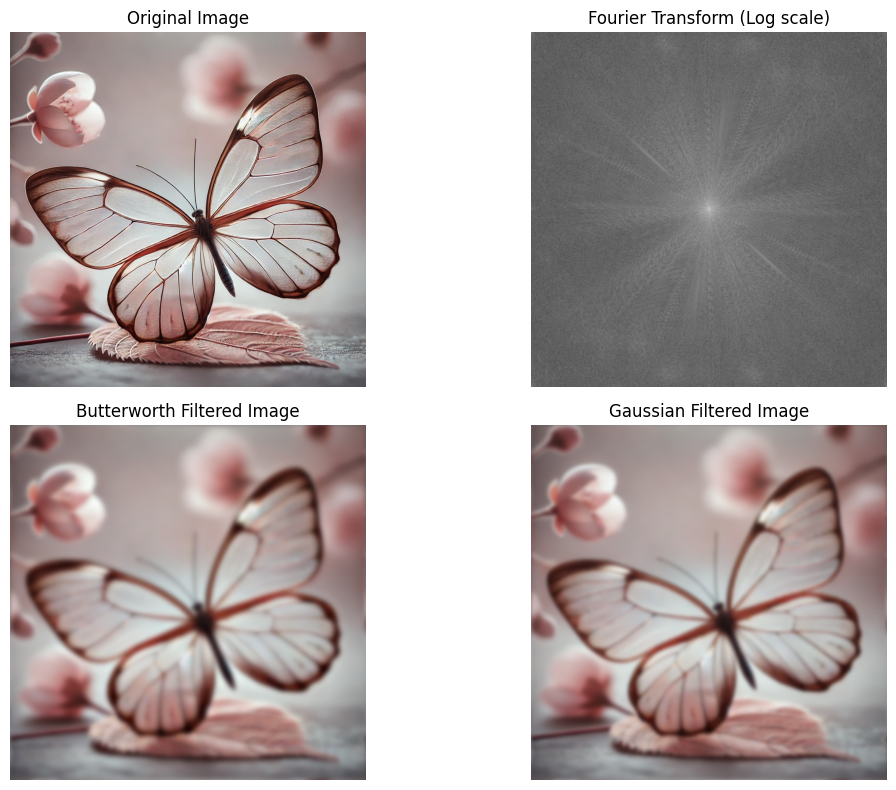

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


def create_butterworth_filter(shape, cutoff, order):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    distance = np.sqrt((np.arange(rows)[:, None] - crow) ** 2 + (np.arange(cols) - ccol) ** 2)
    butterworth = 1 / (1 + (distance / cutoff) ** (2 * order))
    return butterworth


def create_gaussian_filter(shape, sigma):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    distance = np.sqrt((np.arange(rows)[:, None] - crow) ** 2 + (np.arange(cols) - ccol) ** 2)
    gaussian = np.exp(-(distance ** 2) / (2 * (sigma ** 2)))
    return gaussian


img_path = 'butterful.png'
img = cv2.imread(img_path)
if img is None:
    print(f"Error: Image not found or unable to load from '{img_path}'.")
else:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


    butter_filtered_img = np.zeros_like(img, dtype=np.float32)
    gaussian_filtered_img = np.zeros_like(img, dtype=np.float32)


    for channel in range(3):  # For R, G, B channels
        f_transform = np.fft.fft2(img[:, :, channel])
        f_transform_shift = np.fft.fftshift(f_transform)


        butter_mask = create_butterworth_filter(img.shape[:2], cutoff=30, order=2)
        gaussian_mask = create_gaussian_filter(img.shape[:2], sigma=30)


        butter_filtered = f_transform_shift * butter_mask
        butter_filtered_img[:, :, channel] = np.fft.ifft2(np.fft.ifftshift(butter_filtered)).real


        gaussian_filtered = f_transform_shift * gaussian_mask
        gaussian_filtered_img[:, :, channel] = np.fft.ifft2(np.fft.ifftshift(gaussian_filtered)).real


    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    f_transform_shift = np.fft.fftshift(np.fft.fft2(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)))
    plt.imshow(np.log(1 + np.abs(f_transform_shift)), cmap='gray')
    plt.title('Fourier Transform (Log scale)')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(np.clip(gaussian_filtered_img, 0, 255).astype(np.uint8))
    plt.title('Gaussian Filtered Image')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.imshow(np.clip(butter_filtered_img, 0, 255).astype(np.uint8))
    plt.title('Butterworth Filtered Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()



The code applies both Butterworth and Gaussian filters in the frequency domain to an image. First, it defines each filter: the Butterworth filter attenuates high frequencies based on a cutoff frequency and filter order, creating sharper transitions, while the Gaussian filter uses a sigma value for smooth, gradual attenuation. The image is loaded and converted to RGB, then each color channel undergoes a Fourier Transform to move into the frequency domain. Here, the Butterworth and Gaussian filters are applied, after which the inverse Fourier Transform brings the filtered data back into the spatial domain.

The Butterworth-filtered image retains some texture and detail due to its sharper cutoff, making it useful for reducing noise while preserving edges. Conversely, the Gaussian filter produces a uniform, soft blur effect without abrupt transitions, ideal for removing high-frequency noise and achieving a smooth, blended appearance. Thus, the Butterworth filter is suited for preserving texture, while the Gaussian filter is ideal for soft blurring and noise reduction.